# Aula 8 - Modelos Lineares Generalizados


por **Cibele Russo**

**ICMC/USP - São Carlos SP**



## Programa

- Modelos lineares generalizados.

- Família exponencial de distribuições.

- O modelo de regressão logística

- A qualidade do ajuste.

- Aplicações (enfoque frequentista e enfoque Bayesiano)




**Referências e Leituras sugeridas:**


- Paula, G. A. Modelos de regressão: com apoio computacional. São Paulo: IME-USP, 2013. Disponível em https://www.ime.usp.br/~giapaula/texto_2013.pdf

- Dobson, A. J.; Barnett, Adrian G. (2018). An introduction to generalized linear models. CRC press.

- https://www.statsmodels.org/stable/glm.html

# Modelos lineares


**Objetivos**

Predizer $Y$ a partir do conhecimento de variáveis preditoras em $X = x$.


Um modelo linear considerando pares observados de $(X_i, Y_i), i=1,\ldots,n$, em que $X_i$ é um vetor de preditoras é dado por

$$\large{Y_i = X_i^\top\beta+\epsilon_i,}$$

em que, para o $i$-ésimo elemento amostral, temos

- $Y_i$ é a **variável resposta** (aleatória observável),

- $X_i$ contém **variáveis preditoras** (vetor conhecido, ou seja, não-aleatório),

- $\beta$ é um **vetor de parâmetros de interesse**, que queremos estimar,

- $\epsilon_i$ é o **erro aleatório** (não observável).


Suposições do modelo linear geral:

- $ E(Y_i) = \mu_i =  X_i^\top\beta$

- $\epsilon_i \stackrel{i.i.d}{\sim} N(0, \sigma^2)$

- Consequentemente $ Y_i|X_i \sim N(\mu_i, \sigma^2).$

O modelo linear (normal) é muito útil, mas nem sempre as suposições estão satisfeitas. É importante ter metodologias mais adequadas, em especial, para casos em que

- A variável resposta não possui distribuição Normal.

- A associação entre a resposta e as preditoras não é linear.



#  Modelo linear generalizado (MLG)

Nelder, John; Wedderburn, Robert (1972). Generalized Linear Models. Blackwell Publishing. Journal of the Royal Statistical Society. Series A (General). 135: 370–384. JSTOR 2344614. doi:10.2307/2344614

Os MLGs propõem a modelagem para variáveis na família exponencial de distribuições, que inclui

- Binomial (Bernoulli)
- Poisson
- Normal
- Binomial Negativa
- Gama
- Gaussiana Inversa
- outras



### A família exponencial de distribuições

Seja $Y_i$ uma variável aleatória cuja distribuição pode ser escrita na forma


$$\large f(y,\theta_i, \phi) = exp[\phi\{y \theta_i - b(\theta_i)\} + c(y, \phi)]$$


Dizemos que a distribuição de $Y_i$ pertence à família exponencial e escrevemos $$\large Y_i \sim FE(\mu_i, \phi),$$


em que $\mu_i = E(Y_i) = b'(\theta_i)$ é o parâmetro de posição e $\phi^{-1}$ o parâmetro de dispersão.


Além disso, $Var(Y_i) = \phi^{-1}V_i$ com $V_i = \displaystyle\frac{d\mu}{d\theta}$ a **função de variância**.



Então dizemos que um MLG é determinado pela **função de ligação**
$g(\mu_i) = \eta_i$ e pela **função de variância** $V(\mu)$.



Valores de $b$, $\theta$, $\phi$ e $V(\mu)$ para algumas distribuições são apresentados na tabela a seguir


<table>
  <tr>
    <th>Distribuição</th>
    <th>$b$</th>
    <th><center>$\theta$</center></th>
    <th><center>$\phi$</center></th>
    <th><center>$V(\mu)$</center></th>
  </tr>
      <tr>
      <th>Normal</th>
    <td> \begin{eqnarray}\theta^2/2\end{eqnarray}</td>
    <td> \begin{eqnarray}\mu\end{eqnarray} </td>
    <td> \begin{eqnarray}\sigma^{-2}\end{eqnarray}</td>
     <td> \begin{eqnarray}1\end{eqnarray}</td>
  </tr>
  <tr>
    <th>Poisson</th>
    <td> \begin{eqnarray}e^{\theta}\end{eqnarray}</td>
    <td> \begin{eqnarray}\log \mu\end{eqnarray} </td>
    <td> \begin{eqnarray}1\end{eqnarray} </td> 
    <td> \begin{eqnarray}\mu\end{eqnarray} </td>
  </tr>      <tr>
    <th>Binomial</th>
    <td> \begin{eqnarray}\log\left(1+e^\theta\right)\end{eqnarray}</td>
    <td>\begin{eqnarray} \log\{\mu/(1-\mu)\}\end{eqnarray} </td>
    <td>\begin{eqnarray} n\end{eqnarray}</td>
      <td>\begin{eqnarray} \mu(1-\mu)\end{eqnarray}</td>
  </tr>
</table> 

## Função de ligação

O modelo linear generalizado é definido por 

$$\begin{array}{c}\large Y_i \sim FE(\mu_i, \phi) \\\large g(\mu_i) = \eta_i\end{array}$$

em que 

- $ \eta_i = X_i^\top\beta$ é o **preditor linear**,

- $\beta = (\beta_0, \beta_1,\ldots, \beta_p)^\top$, $p<n$ é um vetor de parâmetros desconhecidos (coeficientes da regressão), 

- $ X_i = (1, X_{i1},\ldots, X_{ip})^\top$ representa os valores de $p$ variáveis preditoras e 

- $g(\mu_i)$ é a **função de ligação**, uma função monótona e diferenciável.






### Exemplos


#### Modelo Normal 

Se $Y\sim N(\mu, \sigma^2)$, com densidade

$$\begin{array}{lll}f(y) &=& \displaystyle\frac{1}{\sqrt{2\pi\sigma^2}}\exp\left\{-\frac{1}{2\sigma^2}(y-\mu)^2\right\} = \\ &=&\displaystyle\exp\left[ \left\{ \frac{1}{\sigma^2}\left( \mu y - \frac{\mu^2}{2}\right)  \right\}- \frac{1}{2} \left\{ \log 2 \pi \sigma^2 + \frac{y^2}{\sigma^2}\right\}\right],\end{array}$$

em que $-\infty < \mu < \infty$ e $\sigma^2>0$.

Logo, $\theta = \mu$, $b(\theta) = \theta^2/2 $, $\phi=\sigma^{-2}$ e $c(y, \phi) = \frac{1}{2} \log(\phi/2\pi) - \phi y^2/2$. Verifica-se que $V(\mu) = 1$.



#### Modelo Poisson: para dados de contagem

Se $Y\sim P(\mu)$, com densidade dada por

$$ f(y) =P(Y=y) =   \displaystyle\frac{e^{-\mu} \mu^y}{y!} = exp(y \log\mu -\mu -\log y!), $$

em que $\mu>0$ e $y=0,1,...$

Assim $\theta = \log\mu$, $b(\theta) = e^\theta$, $\phi=1$ e $c(y, \phi) = -\log y!$. Segue que $V(\mu) = \mu$.



#### Modelo Binomial: para modelar proporções


Se $Y^\star$ é a proporção de sucessos em $n$ ensaios independentes de Bernoulli, cada um com probabilidade de sucesso $\mu$, então $nY^\star\sim B(n,\mu)$, com densidade dada por

$$\begin{array}{lll}f(y)  &=& P(Y=y) = \left(\begin{array}{c} n\\ ny^\star\end{array}\right)\mu ^{ny^\star}(1-\mu)^{n-ny^\star} = \\ &=&\exp\left\{\log  \left(\begin{array}{c} n\\ ny^\star\end{array}\right) + ny^\star \log\left(\displaystyle\frac{\mu}{1-\mu} + n\log(1-\mu)\right)\right\},\end{array}  $$

em que $\mu>0$, $y^\star<1$. Nesse caso, $\phi =n$, $\theta = \log\displaystyle\left(\frac{\mu}{1-\mu}\right)$, $b(\theta) = \log(1+e^\theta)$, e $c(y^\star, \phi) = \log  \left(\begin{array}{c} \phi\\ \phi y^\star\end{array}\right)$. Segue que $V(\mu) = \mu(1-\mu)$.




### Função de ligação canônica

Se $\theta_i = \eta_i = X_i^\top\beta$, então $\eta$ é chamada de **ligação canônica**.

- No modelo **normal**, a ligação canônica é $\eta = \mu $

- No modelo **Poisson**, a ligação canônica é $\eta = \log\mu$

- No modelo **binomial**, a ligação canônica é $\eta = \log\displaystyle\left\{\frac{\mu}{1-\mu}\right\}$



## O modelo de regressão logística

Um dos modelos lineares mais utilizados é o modelo de regressão logística.

Neste modelo, consideramos


$Y_i = \left\{\begin{array}{l}1, \mbox{ se o indivíduo i possui determinada característica}\\ 0, \mbox{ caso contrário}\end{array}\right.$

Supondo que $P(Y_i|X_i) = \pi(X_i)$ e que

$$\log\left\{\displaystyle\frac{\pi(x)}{1-\pi(x)}\right\} = \alpha+\beta x$$

e queremos estimar os parâmetros $\alpha$ e $\beta$ para compreender como $X_i$ e $Y_i$ estão associados.



Suponha que $X_i=1$ indique que o indivíduo $i$ possui um fator de risco para uma determinada doença (indicada por $Y_i=1)$ e foram observados $n_1$ indivíduos com a presença deste fator, e $n_2$ indivíduos sem a presença deste fator ($X_i=0$). 


Para os indivíduos que possuiam o fator, a **chance** de desenvolvimento da doença fica

$$\displaystyle\frac{\pi(1)}{1-\pi(1)} = e^{\alpha + \beta},$$

enquanto que a **chance** de desenvolvimento da doença no indivíduo com ausência do fator é

$$\displaystyle\frac{\pi(0)}{1-\pi(0)} = e^{\alpha }.$$


A razão de chances nesse caso fica

$$\psi =  \displaystyle\frac{\pi(1)/(1-\pi(1))}{\pi(0)/(1-\pi(0))} = e^\beta.$$



### Regressão logística múltipla


O modelo de regressão logística pode ser estendido para incluir $p$ variáveis preditoras:

$Y_i = \left\{\begin{array}{l}1, \mbox{ se o indivíduo i possui determinada característica}\\ 0, \mbox{ caso contrário}\end{array}\right.$

Supondo que $P(Y_i|X_i) = \pi(X_i)$ e que

$$\log\left\{\displaystyle\frac{\pi(x)}{1-\pi(x)}\right\} = \beta_0 + \beta_1 x_{1} + \beta_2 x_{2} + \ldots + \beta_p x_{p}.$$


## A estimação dos parâmetros

No **enfoque clássico**, é comum obter os **estimadores de máxima verossimilhança** por métodos iterativos como

- Método de Newton-Raphson

- Método escore de Fisher

- Método dos mínimos quadrados ou mínimos quadrados reponderados


No **enfoque Bayesiano**, supomos distribuições de probabilidade para os coeficientes da regressão com métodos computacionais e obtemos estimativas a partir de amostras da distribuição a posteriori dos parâmetros, como Monte Carlo Hamiltoniano ou No U-Turn Sampler (NUTS).

# A qualidade do ajuste


A qualidade do ajuste pode ser avaliada com

**Análise de diagnóstico**
- Resíduos ordinários, 
- Resíduos studentizados, 
- Pontos de alavanca, 
- Distância de Cook
- Envelopes para os resíduos (disponível em R por https://www.ime.usp.br/~giapaula)
- Deviance (função desvio, para mais informações ver https://www.ime.usp.br/~giapaula/texto_2013.pdf)
- Resíduo componente do desvio

**Métricas de ajuste**
- Erro absoluto médio
- Erro quadrático médio
- Raiz do erro quadrático médio


**Seleção de modelos**
- Método forward
- Método backward
- Método stepwise
- Critérios de informação (AIC, BIC)


# Modelos Lineares generalizados

In [17]:
import numpy as np
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

## MLG: Dados com resposta binomial

Referência sugerida: https://www.statsmodels.org/devel/examples/notebooks/generated/glm.html


## Aplicação

Considere os dados do arquivo dados_banco.csv. Estão disponíveis as variáveis:

- Cliente: Identificador do cliente.
- Sexo: Feminino (F) ou Masculino (M)
- Idade: Idade do cliente, em anos completos.
- Empresa: Tipo da empresa em que trabalha: Pública, Privada ou Autônomo
- Salário: Salário declarado pelo cliente na abertura da conta, em reais.
- Saldo_cc: Saldo em conta corrente, em reais.
- Saldo_poupança: Saldo em poupança, em reais.
- Saldo_investimento: Saldo em investimentos, em reais.
- Devedor_cartao: Valor em atraso no cartão de crédito, em reais.
- Inadimplente: Se o cliente é considerado inadimplente atualmente (1) ou não (0), de acordo com critérios preestabelecidos.

In [18]:
import pandas as pd


# Indique o seu diretório se necessário
#pkgdir = '/home/cibele/Google Drive/MBA/ECD/Data'

# Dados banco - Leitura dos dados
#dados = pd.read_csv(f'{pkgdir}/dados_banco.csv', index_col=0)

# Dados banco - Leitura dos dados
dados = pd.read_csv('dados_banco.csv', index_col=0)


# Vamos trabalhar com uma amostra como na Aula 6
dados = dados.sample(n=500, replace=False, random_state=10)


dados.head()

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente
53080,53080,M,31,Privada,5717.00,1205.56,0.0,0.0,2313.15,0
86540,86540,M,38,Privada,6523.00,1370.21,0.0,0.0,3202.99,0
96211,96211,M,33,Pública,5378.00,750.60,0.0,0.0,4225.13,0
42117,42117,M,34,Autônomo,5496.82,896.48,0.0,0.0,3365.48,1
49964,49964,M,35,Privada,6137.00,774.12,0.0,0.0,4135.15,0


**Divisão da base em treino e teste**

In [19]:
dados_treino, dados_teste = train_test_split(dados,train_size = 0.8,random_state=3)

### Ajustando um MLG com resposta binária

In [20]:
### Ajustando um MLG com resposta binária, iniciando com 4 preditoras

preditoras = dados_treino[['Idade','Devedor_cartao','Salario','Saldo_cc']]
resposta = dados_treino[['Inadimplente']]


In [21]:
preditoras

,Idade,Devedor_cartao,Salario,Saldo_cc
56455,35,2370.58,5645.78,881.15
85723,31,2509.16,5560.00,411.92
3478,28,4269.03,5234.00,982.51
31829,34,1196.30,5610.00,1084.03
38218,29,2191.62,5131.00,674.81
...,...,...,...,...
45916,30,5102.12,4957.82,770.16
36647,31,2012.71,5111.68,591.95
2141,29,3895.29,5218.00,1141.87
77304,36,3192.87,5602.00,1234.37


In [22]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:           Inadimplente   No. Observations:                  400
Model:                            GLM   Df Residuals:                      396
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -137.45
Date:                Mon, 23 May 2022   Deviance:                       274.90
Time:                        00:55:33   Pearson chi2:                     336.
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Idade              0.3067      0.099      3.

In [23]:
ajustado = res.predict(preditoras)


In [24]:
X_teste = dados_teste[['Idade','Devedor_cartao','Salario','Saldo_cc']]
Y_teste = dados_teste[['Inadimplente']]

predito = res.predict(X_teste)


In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(predito, Y_teste)


0.08727882133957367

In [26]:
res.aic

282.90066363214913

**Segundo modelo, excluindo Saldo_cc**

In [27]:
preditoras = dados_treino[['Idade','Devedor_cartao', 'Salario']]
resposta = dados_treino[['Inadimplente']]

In [28]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Inadimplente   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -180.33
Date:                Mon, 23 May 2022   Deviance:                       360.67
Time:                        00:55:33   Pearson chi2:                     386.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Idade              0.2325      0.081      2.

In [29]:
ajustado = res.predict()

In [30]:
X_teste = dados_teste[['Idade','Devedor_cartao','Salario']]
Y_teste = dados_teste[['Inadimplente']]

predito = res.predict(X_teste)


In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_squared_error(predito, Y_teste)

0.12779719792213345

In [32]:
res.aic

366.66806770355123

In [33]:
n=len(dados_treino)
dados_treino.loc[:,'const']  = np.ones(n).reshape(n,1)

In [34]:
dados_treino.head()

,Cliente,Sexo,Idade,Empresa,Salario,Saldo_cc,Saldo_poupança,Saldo_investimento,Devedor_cartao,Inadimplente,const
56455,56455,M,35,Privada,5645.78,881.15,0.0,0.0,2370.58,1,1.0
85723,85723,F,31,Privada,5560.00,411.92,0.0,0.0,2509.16,0,1.0
3478,3478,M,28,Pública,5234.00,982.51,0.0,0.0,4269.03,0,1.0
31829,31829,M,34,Pública,5610.00,1084.03,0.0,0.0,1196.30,0,1.0
38218,38218,F,29,Pública,5131.00,674.81,0.0,0.0,2191.62,0,1.0


In [35]:
preditoras = dados_treino[['Idade','Devedor_cartao', 'Salario']]
resposta = dados_treino[['Inadimplente']]


In [36]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Inadimplente   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -180.33
Date:                Mon, 23 May 2022   Deviance:                       360.67
Time:                        00:55:33   Pearson chi2:                     386.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Idade              0.2325      0.081      2.

In [37]:
res.aic

366.66806770355123

**Análise de diagnóstico para o segundo modelo, agora com a base toda**

In [38]:
preditoras = dados[['Idade','Devedor_cartao', 'Salario']]
resposta = dados[['Inadimplente']]

In [39]:
glm_binom = sm.GLM(resposta, preditoras, family=sm.families.Binomial())
res = glm_binom.fit()
ajustado = res.predict()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           Inadimplente   No. Observations:                  500
Model:                            GLM   Df Residuals:                      497
Model Family:                Binomial   Df Model:                            2
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -219.33
Date:                Mon, 23 May 2022   Deviance:                       438.66
Time:                        00:55:33   Pearson chi2:                     473.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Idade              0.2322      0.075      3.

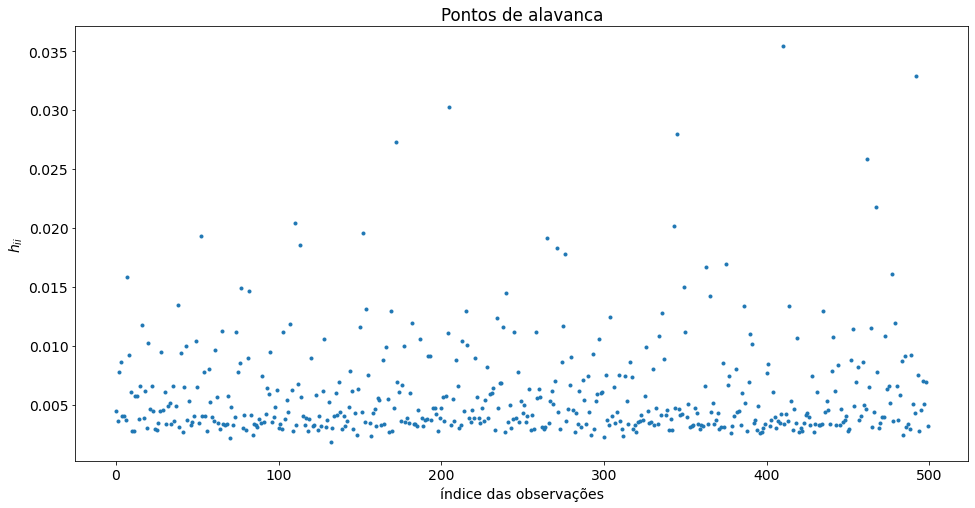

In [40]:
# Gráfico de pontos de alavanca

fig, ax = plt.subplots()

plt.plot(res.get_hat_matrix_diag(), '.')

ax.set_title('Pontos de alavanca')
ax.set_ylabel('$h_{ii}$')
ax.set_xlabel('índice das observações');

plt.show()


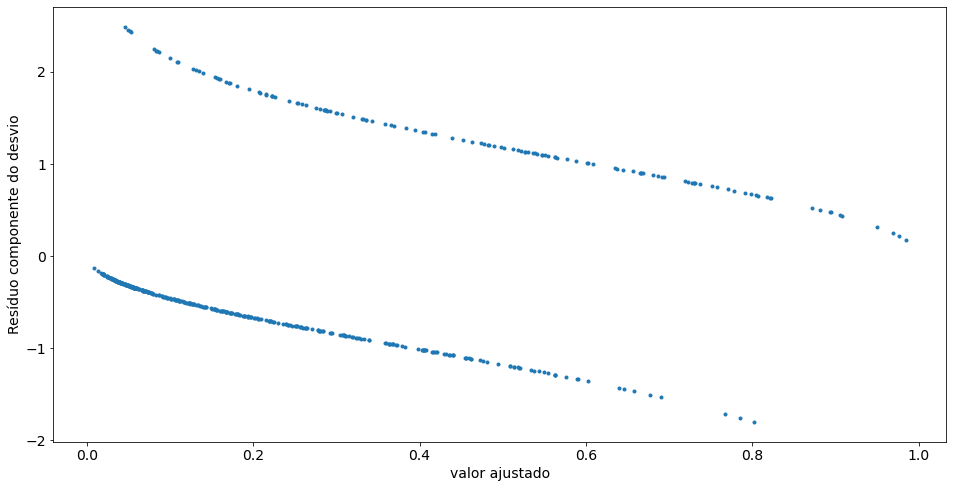

In [41]:
# Gráfico de Resíduo Componente do desvio

fig, ax = plt.subplots()
plt.plot(ajustado,res.resid_deviance,  '.')


ax.set_ylabel('Resíduo componente do desvio')
ax.set_xlabel('valor ajustado');

plt.show()


In [42]:
# x and y given as DataFrame columns
import plotly.express as px

fig = px.scatter(x = ajustado, y=res.resid_deviance)
fig.show()

## Modelos lineares generalizados: um enfoque Bayesiano



In [43]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy as pt
import pymc3 as pm
import seaborn as sns

print(f"Running on PyMC3 v{pm.__version__}")

Running on PyMC3 v3.11.4


In [44]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

### Aplicação

Fonte: https://docs.pymc.io/notebooks/GLM-poisson-regression.html

Este conjunto de dados fictício foi criado para emular alguns dados criados como parte de um estudo do self quantificado, e os dados reais são mais complicados do que isso. 

Descrição dos dados

- O sujeito espirra N vezes por dia, registrado como nsneeze (int)

- O sujeito pode ou não beber álcool durante o dia, registrado como álcool (booleano)

- O sujeito pode ou não tomar um medicamento anti-histamínico durante esse dia, registrado como ação negativa denominada (booleano)

- Os dados são agregados por dia, para produzir uma contagem total de espirros naquele dia, com um sinalizador booleano para o uso de álcool e anti-histamínicos, com a grande suposição de que os espirros têm uma relação causal direta.

- Crie 4000 dias de dados: contagens diárias de espirros que são distribuídos por Poisson durante o consumo de álcool e o uso de anti-histamínicos

In [45]:
# decide poisson theta values
theta_noalcohol_meds = 1  # no alcohol, took an antihist
theta_alcohol_meds = 3  # alcohol, took an antihist
theta_noalcohol_antihist = 6  # no alcohol, no antihist
theta_alcohol_antihist = 36  # alcohol, no antihist

# create samples
q = 1000
df = pd.DataFrame(
    {
        "nsneeze": np.concatenate(
            (
                np.random.poisson(theta_noalcohol_meds, q),
                np.random.poisson(theta_alcohol_meds, q),
                np.random.poisson(theta_noalcohol_antihist, q),
                np.random.poisson(theta_alcohol_antihist, q),
            )
        ),
        "alcohol": np.concatenate(
            (
                np.repeat(False, q),
                np.repeat(True, q),
                np.repeat(False, q),
                np.repeat(True, q),
            )
        ),
        "antihist": np.concatenate(
            (
                np.repeat(False, q),
                np.repeat(False, q),
                np.repeat(True, q),
                np.repeat(True, q),
            )
        ),
    }
)

In [46]:
df.tail()

,nsneeze,alcohol,antihist
3995,40,True,True
3996,30,True,True
3997,37,True,True
3998,22,True,True
3999,33,True,True


In [47]:
df.groupby(["alcohol", "antihist"]).mean().unstack()

nsneeze        
antihist   False    True
alcohol                 
False      1.047   6.002
True       3.089  36.004

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:88: UserWarning:

This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 



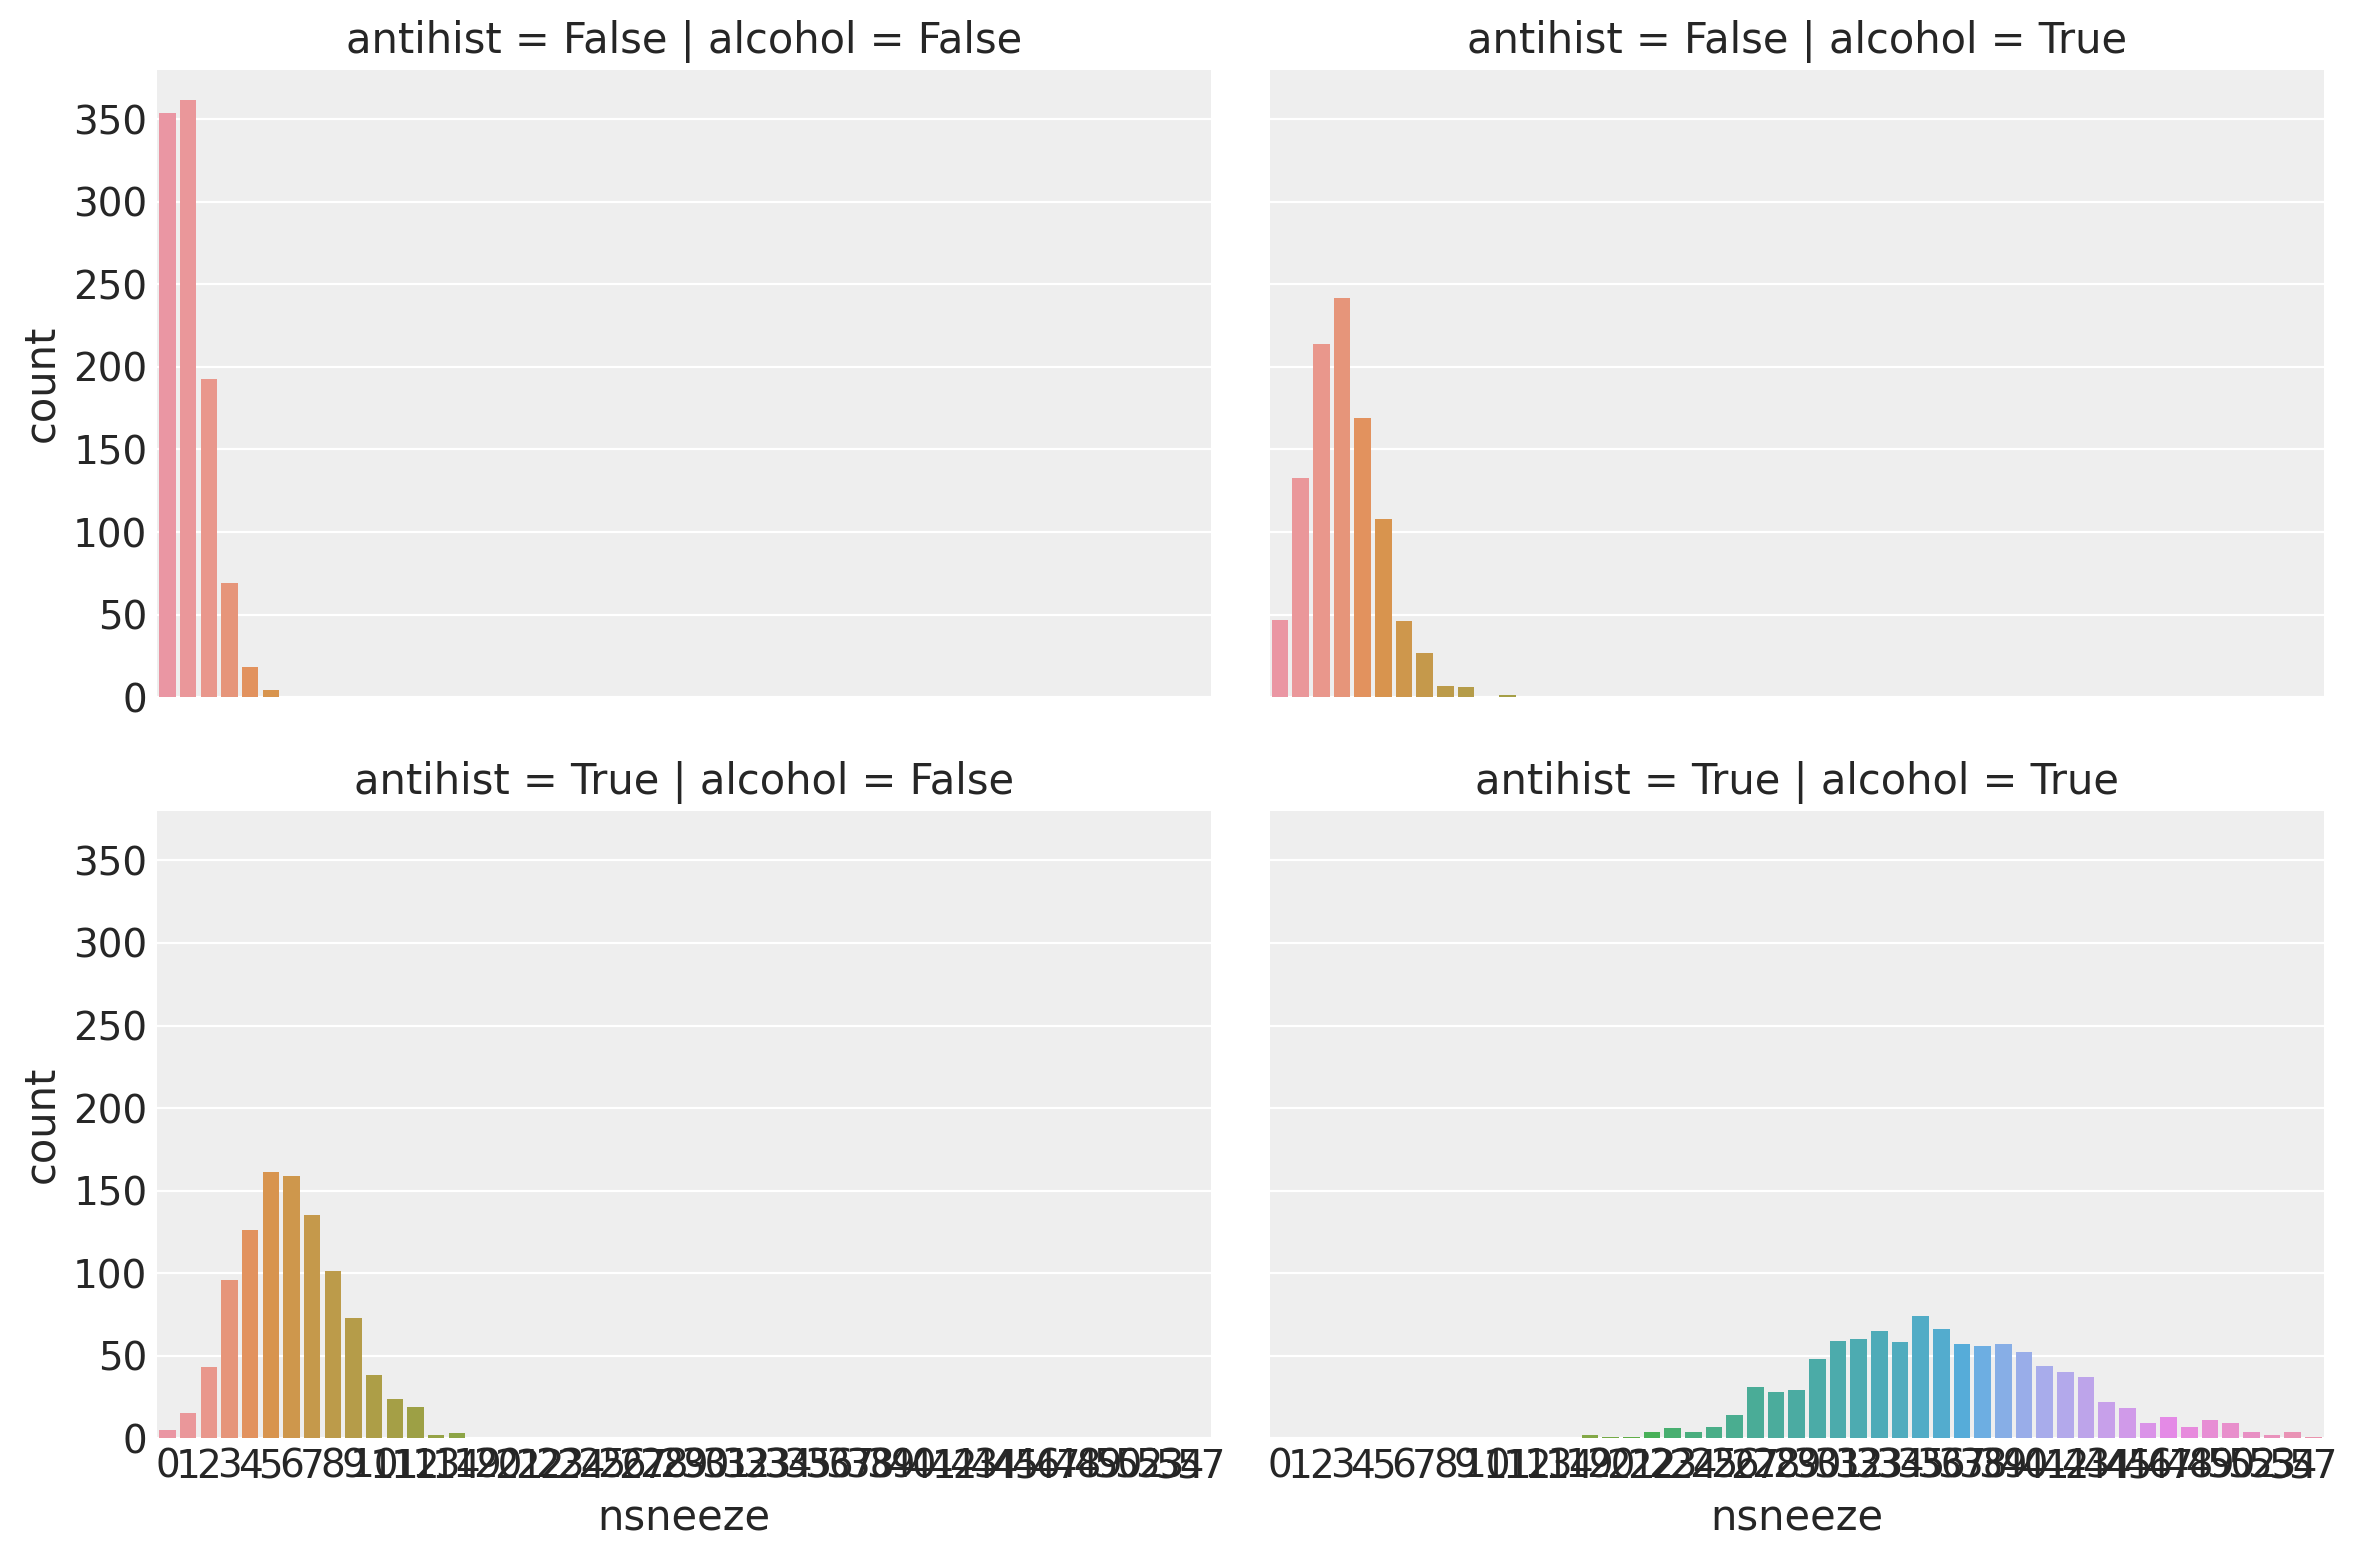

In [48]:
g = sns.catplot(
    x="nsneeze",
    row="antihist",
    col="alcohol",
    data=df,
    kind="count",
    height=4,
    aspect=1.5,
)

In [49]:
fml = "nsneeze ~ alcohol + antihist + alcohol:antihist"  # full patsy formulation

In [50]:
fml = "nsneeze ~ alcohol * antihist"  # lazy, alternative patsy formulation

In [51]:
(mx_en, mx_ex) = pt.dmatrices(fml, df, return_type="dataframe", NA_action="raise")

In [52]:
pd.concat((mx_ex.head(3), mx_ex.tail(3)))

,Intercept,alcohol[T.True],antihist[T.True],alcohol[T.True]:antihist[T.True]
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0
3997,1.0,1.0,1.0,1.0
3998,1.0,1.0,1.0,1.0
3999,1.0,1.0,1.0,1.0


In [53]:
with pm.Model() as mdl_Poisson:

    # define priors, weakly informative Normal
    b0 = pm.Normal("b0_intercept", mu=0, sigma=10)
    b1 = pm.Normal("b1_alcohol[T.True]", mu=0, sigma=10)
    b2 = pm.Normal("b2_antihist[T.True]", mu=0, sigma=10)
    b3 = pm.Normal("b3_alcohol[T.True]:antihist[T.True]", mu=0, sigma=10)

    # define linear model and exp link function
    eta = (
        b0
        + b1 * mx_ex["alcohol[T.True]"]
        + b2 * mx_ex["antihist[T.True]"]
        + b3 * mx_ex["alcohol[T.True]:antihist[T.True]"]
    )

    ## Define Poisson likelihood
    y = pm.Poisson("y", mu=np.exp(eta), observed=mx_en["nsneeze"].values)

**Obtenção das amostras**

In [54]:
with mdl_Poisson:
    inf_Poisson = pm.sample(1000, tune=1000, cores=4, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [b3_alcohol[T.True]:antihist[T.True], b2_antihist[T.True], b1_alcohol[T.True], b0_intercept]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 64 seconds.
The acceptance probability does not match the target. It is 0.9284319245239833, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


**Diagnóstico do modelo**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee197c3750>,
      dtype=object)

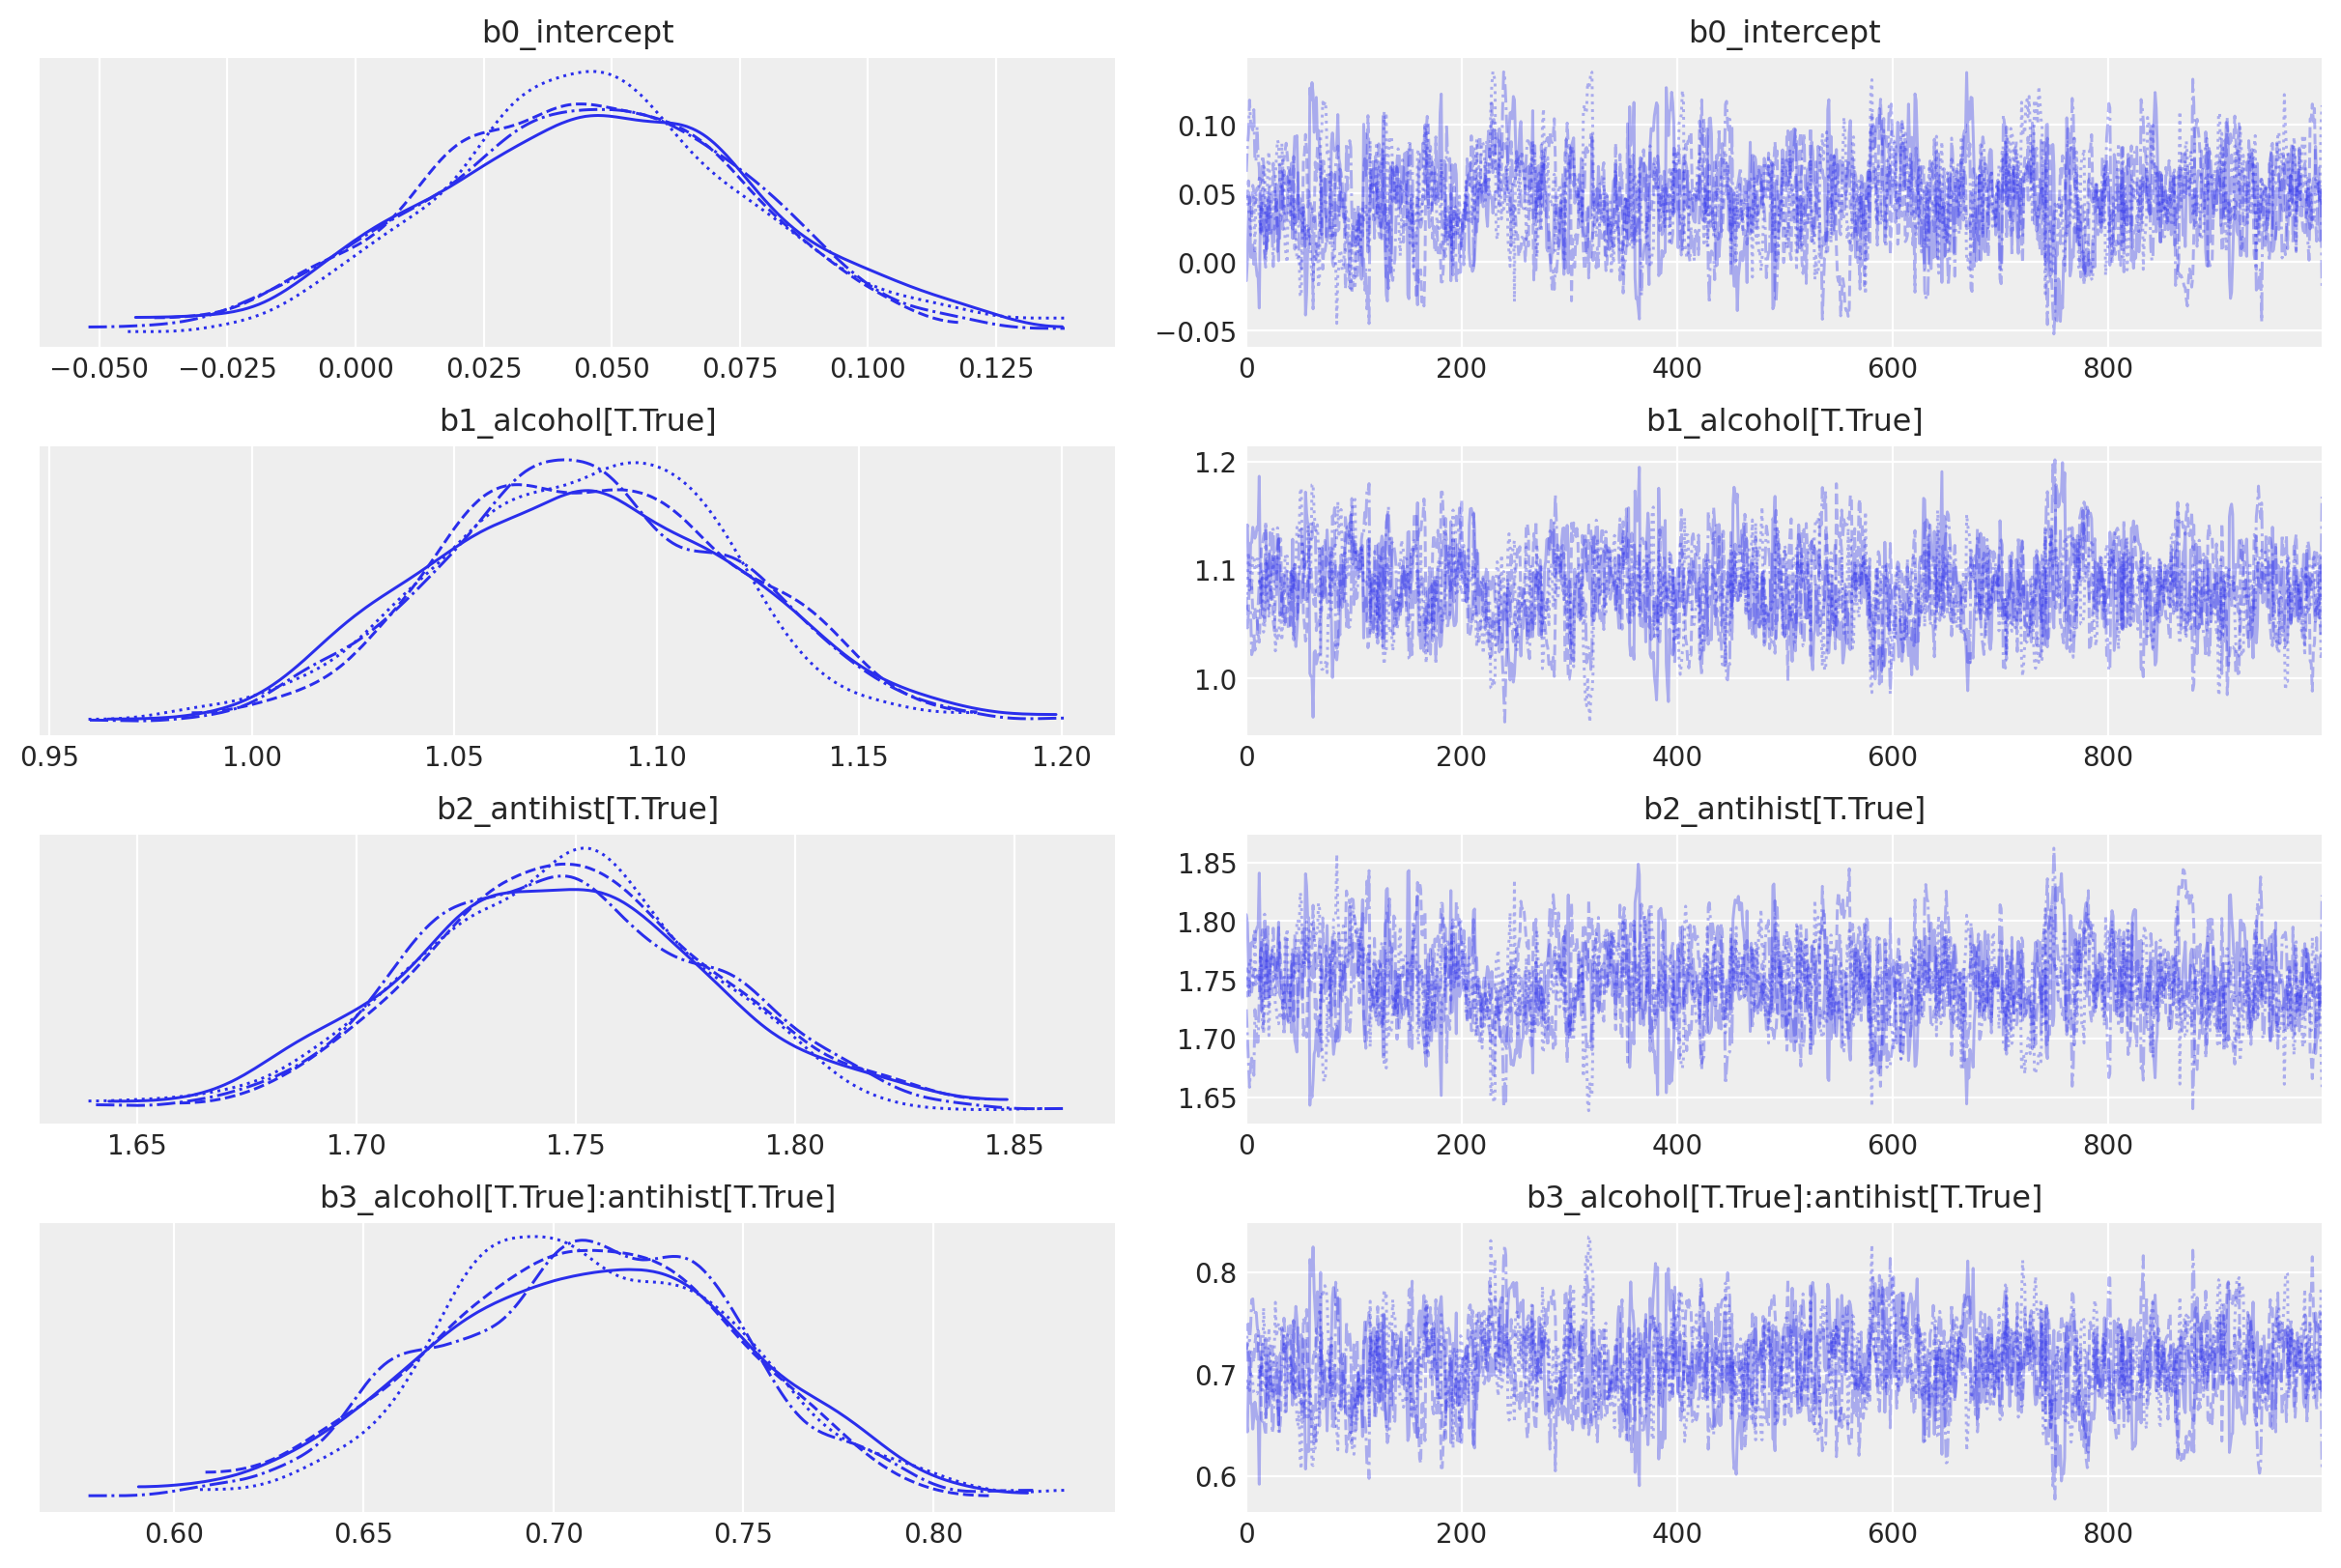

In [55]:
az.plot_trace(inf_Poisson)

**Estimação dos parâmetros**

In [56]:
np.exp(az.summary(inf_Poisson)[["mean", "hdi_3%", "hdi_97%"]])

,mean,hdi_3%,hdi_97%
b0_intercept,1.047074,0.986098,1.107383
b1_alcohol[T.True],2.950575,2.751098,3.145585
b2_antihist[T.True],5.737365,5.387061,6.116561
b3_alcohol[T.True]:antihist[T.True],2.031958,1.883252,2.181472


**Outra forma, usando pymc.glm**

In [57]:
with pm.Model() as mdl_Poisson_alt:

    pm.glm.GLM.from_formula(fml, df, family=pm.glm.families.Poisson())

The glm module is deprecated and will be removed in version 4.0
We recommend to instead use Bambi https://bambinos.github.io/bambi/


In [58]:
with mdl_Poisson_alt:
    inf_Poisson_alt = pm.sample(2000, tune=2000, return_inferencedata=True)

WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
WARNING (theano.tensor.blas): We did not find a dynamic library in the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu, alcohol[T.True]:antihist[T.True], antihist[T.True], alcohol[T.True], Intercept]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 149 seconds.
The number of effective samples is smaller than 25% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fee21363150>,
      dtype=object)

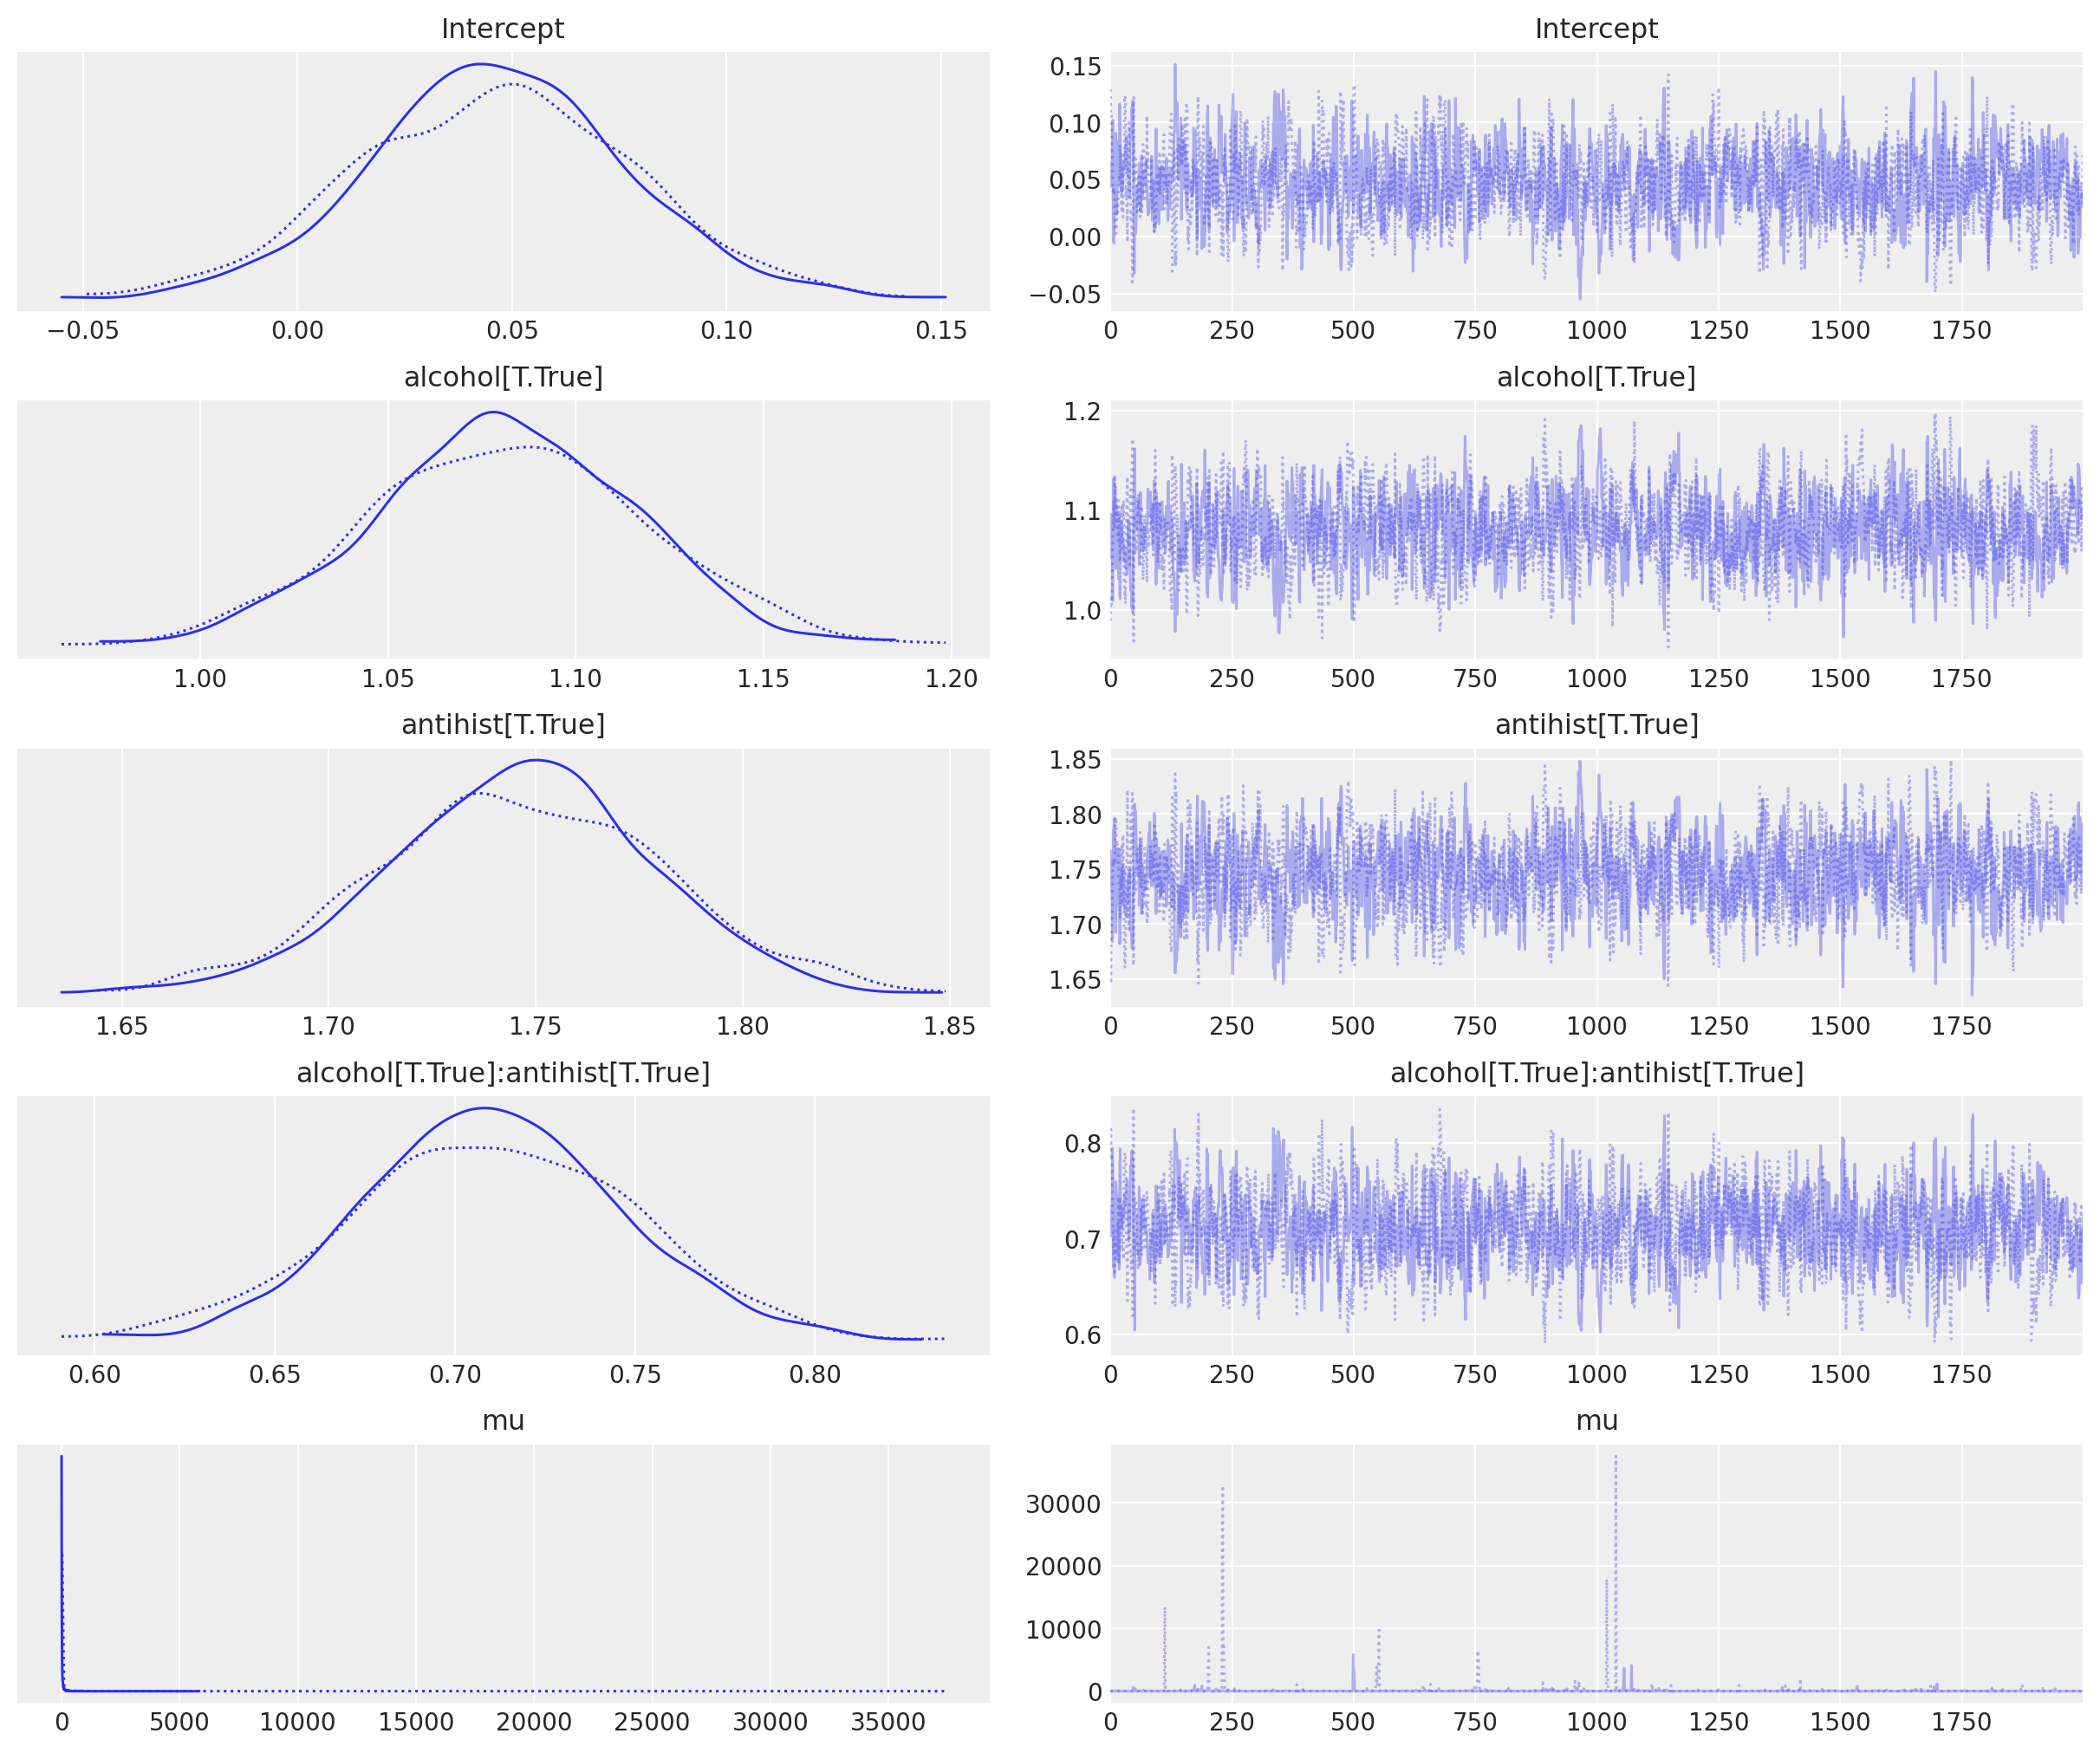

In [59]:
az.plot_trace(inf_Poisson_alt)

**Estimação dos parâmetros, com a transformação exp**

In [60]:
np.exp(az.summary(inf_Poisson)[["mean", "hdi_3%", "hdi_97%"]])

,mean,hdi_3%,hdi_97%
b0_intercept,1.047074,0.986098,1.107383
b1_alcohol[T.True],2.950575,2.751098,3.145585
b2_antihist[T.True],5.737365,5.387061,6.116561
b3_alcohol[T.True]:antihist[T.True],2.031958,1.883252,2.181472


In [61]:
np.percentile(inf_Poisson_alt.posterior["mu"], [25, 50, 75])

array([ 3.85647939,  9.42477011, 23.98477734])

In [62]:
df["nsneeze"].mean()

11.5355

Exemplo original por Jonathan Sedar 2016-05-15 github.com/jonsedar